# Risky Business

Harold has been boasting about his recent cryptocurrency returns. He's even bet you five bucks that his trading algorithm has made his returns better than yours. Calculate the standard deviation and sharpe ratio for each your portfolios to determine which portfolio is the better investment based off of the greatest risk to reward ratio.

In [75]:
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

### Read in data

In [76]:
harold_portfolio_path = Path("../../Resources/harold_portfolio.csv")
my_portfolio_path = Path("../../Resources/my_portfolio.csv")
risk_free_rate_path= Path("../../Resources/risk_free_rate.csv")

# Read in data
harold_portfolio = pd.read_csv(harold_portfolio_path, parse_dates=True, infer_datetime_format=True)
my_portfolio = pd.read_csv(my_portfolio_path, parse_dates=True, infer_datetime_format=True)
risk_free_rate = pd.read_csv(risk_free_rate_path, parse_dates=True, infer_datetime_format=True)

# Drop na
harold_portfolio = harold_portfolio.dropna()
my_portfolio = my_portfolio.dropna()

# Set Date as index
harold_portfolio = harold_portfolio.set_index('Date')
my_portfolio = my_portfolio.set_index('Date')
risk_free_rate = risk_free_rate.set_index('Date')

harold_portfolio.head()

,BTC,BTT,DOGE,ETH,LTC,XRP,SOLVE,XLM,TRON,ZIL
Date,,,,,,,,,,
2019-05-20,8118.39,0.001187,0.003041,261.09,95.06,0.398003,0.338667,0.135545,0.028509,0.017992
2019-05-19,8200.00,0.001056,0.003178,234.03,86.65,0.417700,0.300430,0.141485,0.029277,0.019170
2019-05-18,7262.40,0.000993,0.003005,244.59,89.88,0.372736,0.287630,0.128833,0.026823,0.017685
2019-05-17,7363.69,0.000957,0.002962,264.39,95.75,0.386193,0.259506,0.126562,0.027220,0.017892
2019-05-16,7878.96,0.000885,0.003168,249.00,102.26,0.419707,0.223316,0.137283,0.028857,0.018725


In [77]:
my_portfolio.head()

,BTC,DOGE,ETH,LTC,XRP,XLM
Date,,,,,,
2019-05-20,8200.00,0.003041,261.09,95.06,0.398003,0.135545
2019-05-19,7262.40,0.003178,234.03,86.65,0.417700,0.141485
2019-05-18,7363.69,0.003005,244.59,89.88,0.372736,0.128833
2019-05-17,7878.96,0.002962,264.39,95.75,0.386193,0.126562
2019-05-16,8203.32,0.003168,249.00,102.26,0.419707,0.137283


In [78]:
risk_free_rate.head()

,rf_rate
Date,
1954-01-04,0.000148
1954-01-05,0.000142
1954-01-06,0.000142
1954-01-07,0.000146
1954-01-08,0.000146


In [79]:
risk_free_rate.index

Index(['1954-01-04', '1954-01-05', '1954-01-06', '1954-01-07', '1954-01-08',
       '1954-01-11', '1954-01-12', '1954-01-13', '1954-01-14', '1954-01-15',
       ...
       '2020-11-19', '2020-11-20', '2020-11-23', '2020-11-24', '2020-11-25',
       '2020-11-27', '2020-11-30', '2020-12-01', '2020-12-02', '2020-12-03'],
      dtype='object', name='Date', length=16722)

### Calculate daily returns 

In [80]:
daily_returns_harold = harold_portfolio.pct_change().dropna()
daily_returns_my = my_portfolio.pct_change().dropna()
risk_free_rate = risk_free_rate.pct_change().dropna()

In [81]:
daily_returns_harold.head()

,BTC,BTT,DOGE,ETH,LTC,XRP,SOLVE,XLM,TRON,ZIL
Date,,,,,,,,,,
2019-05-19,0.010052,-0.110362,0.045051,-0.103642,-0.088470,0.049490,-0.112904,0.043823,0.026939,0.065474
2019-05-18,-0.114341,-0.059659,-0.054437,0.045122,0.037276,-0.107647,-0.042606,-0.089423,-0.083820,-0.077465
2019-05-17,0.013947,-0.036254,-0.014309,0.080952,0.065309,0.036103,-0.097778,-0.017627,0.014801,0.011705
2019-05-16,0.069974,-0.075235,0.069548,-0.058209,0.067990,0.086780,-0.139457,0.084709,0.060140,0.046557
2019-05-15,0.041168,-0.037288,0.044192,-0.126747,-0.103364,0.086484,0.007420,-0.002047,0.086322,0.088224


In [82]:
daily_returns_my.head()

,BTC,DOGE,ETH,LTC,XRP,XLM
Date,,,,,,
2019-05-19,-0.114341,0.045051,-0.103642,-0.088470,0.049490,0.043823
2019-05-18,0.013947,-0.054437,0.045122,0.037276,-0.107647,-0.089423
2019-05-17,0.069974,-0.014309,0.080952,0.065309,0.036103,-0.017627
2019-05-16,0.041168,0.069548,-0.058209,0.067990,0.086780,0.084709
2019-05-15,-0.025892,0.044192,-0.126747,-0.103364,0.086484,-0.002047


### `Concat` portfolios into one DataFrame

In [83]:
daily_returns_concat = pd.concat([daily_returns_harold, daily_returns_my, risk_free_rate], axis='columns', join='inner')
daily_returns_concat.head()

,BTC,BTT,DOGE,ETH,LTC,XRP,SOLVE,XLM,TRON,ZIL,BTC,DOGE,ETH,LTC,XRP,XLM,rf_rate
Date,,,,,,,,,,,,,,,,,
2019-05-17,0.013947,-0.036254,-0.014309,0.080952,0.065309,0.036103,-0.097778,-0.017627,0.014801,0.011705,0.069974,-0.014309,0.080952,0.065309,0.036103,-0.017627,-0.004255
2019-05-16,0.069974,-0.075235,0.069548,-0.058209,0.067990,0.086780,-0.139457,0.084709,0.060140,0.046557,0.041168,0.069548,-0.058209,0.067990,0.086780,0.084709,-0.008439
2019-05-15,0.041168,-0.037288,0.044192,-0.126747,-0.103364,0.086484,0.007420,-0.002047,0.086322,0.088224,-0.025892,0.044192,-0.126747,-0.103364,0.086484,-0.002047,0.004237


### Calculate `std dev` for all data

In [84]:
daily_std = daily_returns_concat.std()
daily_std

BTC        0.028017
BTT        0.022213
DOGE       0.043006
ETH        0.105832
LTC        0.098166
XRP        0.029173
SOLVE      0.075693
XLM        0.055140
TRON       0.036186
ZIL        0.038310
BTC        0.049189
DOGE       0.043006
ETH        0.105832
LTC        0.098166
XRP        0.029173
XLM        0.055140
rf_rate    0.006459
dtype: float64

### Calculate `sharpe ratio` for all data

In [85]:
sharpe_ratios = ((daily_returns_concat.mean()-daily_returns_concat['rf_rate'].mean()) * 365) / (daily_returns_concat.std() * np.sqrt(365))
sharpe_ratios

BTC        30.354973
BTT       -40.228329
DOGE       15.975707
ETH        -5.749503
LTC         2.490577
XRP        47.549589
SOLVE     -18.623669
XLM         8.487922
TRON       29.868864
ZIL        25.756220
BTC        12.131996
DOGE       15.975707
ETH        -5.749503
LTC         2.490577
XRP        47.549589
XLM         8.487922
rf_rate     0.000000
dtype: float64

### Plot Sharpe Ratios

<AxesSubplot:title={'center':'Sharpe Ratios'}>

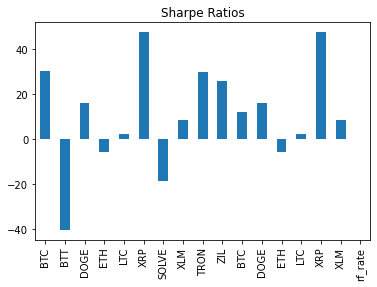

In [86]:
sharpe_ratios.plot(kind='bar', title='Sharpe Ratios')

### How many smart investments did Harold make compared to risky investments? How many did you make?

### Which cryptos have been the smartest investment?

In [65]:
print(risk_free_rate['rf_rate'].mean())

nan
